# <h1><center>CodeIT AI Engineer 3기 Mission 2</center></h1>

## Content Table

1. [문제](#scrollTo=uopJa-FzuDE7)
2. [목표](#scrollTo=mW8pduS_uFhN)
3. [데이터 SET](#scrollTo=pQQp9ApuuIbC)
4. [소개](#scrollTo=_k4q3ZF9uL9d)
5. [전처리](#scrollTo=WAqzEiYYkxFQ)
6. [취소 요인 분석](#scrollTo=wDO8T-kTk6FK)
    - [전체 대비 예약 취소](#scrollTo=yC8DSs5-ZiEj)
    - [가설 1. 예약 확정까지의 대기 일 수가 길수록 취소율이 높을 것이다.](#scrollTo=qfW4v73OqONz)
    - [가설 2. 예약 확정 후 도착일까지 남은 기간이 길수록 취소 확률이 높을 것이다.](#scrollTo=uEBmebU8-hRu)
    - [가설 3. 재방문 고객은 취소율이 낮을 것이다.](#scrollTo=cbyJAApWeKkQ)
    - [가설 4. 배정된 방이 예약된 방과 다를 경우, 취소율에 차이가 있을 것이다.](#scrollTo=AMrYlnsm2RTb)
    - [가설 5. 특정 국가 고객은 취소율이 높을것이다](#scrollTo=lO-OXiBqWo14)
    - [가설 6. 여름 시즌(7~8월)에는 예약 취소율이 더 낮을 것이다.](#scrollTo=MnnZGPh23gGh)
7. [최종 결론](#scrollTo=mY1RuCMJkCfu)
<br />

---



### 문제
해당 데이터는 2015.07.01부터 2017.08.31까지의 Resort Hotel과 City Hotel의 예약 데이터를 포함하고 있습니다.

예약 취소는 호텔의 매출에 영향을 끼치는 요소 중 하나인데요,
지금부터 여러분이 City Hotel과 Resort Hotel의 관리인이라고 상상해 보세요.

호텔 관리인으로서 예약 취소와 관련이 있는 요소들을 파악해보고,
예약 취소율을 줄이기 위한 아이디어도 생각해 볼 겁니다.

어떤 조건에서 예약 취소가 빈번하게 발생하는지, 예약 취소와 관련이 있는 요소들이 무엇인지 파악해보고,
마지막으로 어떻게 하면 예약 취소율을 개선할 수 있을지 아이디어도 얻어 보세요!

<br />

---




### 목표

예약 취소에 영향을 주는 요인을 파악하고, 취소율을 낮출 수 있는 전략을 제시 해보자.

<br />

---



### 데이터 SET
<br />

|컬럼명||설명|
|---|---|---|
|hotel||호텔명 (Resort Hotel 혹은 City Hotel)|
|is_canceled||호텔 예약이 취소되었는지(1) 혹은 취소되지 않았는지(0)를 나타내는 값|
|lead_time||호텔 예약 시점부터 고객의 호텔 도착 시점까지의 기간 (단위: 날짜)|
|arrival_date_year||고객의 호텔 도착 연도|
|arrival_date_month||고객의 호텔 도착 월|
|arrival_date_week_number||고객의 호텔 도착 주 (예시: 2015년도 셋째 주에 도착 → arrival_date_week_number = 3)|
|arrival_date_day_of_month||고객의 호텔 도착 일 (예시: 3월 2일에 도착 → arrival_date_day_of_month = 2)|
|stays_in_weekend_nights||고객이 호텔에 숙박했거나 예약한 주말 밤 수(토요일~일요일) (예시: 평일 3일 주말 2일 예약한 경우 → stays_in_weekend_nights = 2)|
|stays_in_week_nights||고객이 호텔에 숙박했거나 예약한 주중 밤 수(월요일~금요일) (예시: 평일 3일 주말 2일 예약한 경우 → stays_in_week_nights = 3)|
|adults||예약된 어른의 수|
|children||예약된 어린이의 수|
|babies||예약된 아기의 수|
|meal||예약된 식사 유형|
||Undefined/SC|식사 포함되지 않은 옵션|
||BB: Bed & Breakfast|옵션|
||HB: Half board|(아침 식사 및 추가 식사 1회 - 일반적으로 저녁 식사) 옵션|
||FB: Full board|(아침, 점심, 저녁)|
|country||투숙객의 출신 국가. 카테고리는 ISO 3155-3:2013 형식으로 표시 (국가 표기 코드는 링크 참조)|
|market_segment||시장 세그먼트. "TA"는 "Travel Agent", "TO"는 "Tour Operators"를 의미.|
|distribution_channel||예약 유통 채널. "TA"는 "Travel Agent", "TO"는 "Tour Operators"를 의미.|
|is_repeated_guest||이전에 방문을 하였던 손님인지(1) 아닌지(0)를 나타나는 값|
|previous_cancellations||현재 예약 이전에 고객이 취소한 이전 예약 수|
|previous_bookings_not_canceled||현재 예약 이전에 고객이 취소하지 않은 이전 예약 수|
|reserved_room_type||예약한 룸 타입 코드|
|assigned_room_type||배정된 룸 타입 코드. 호텔 운영상의 이유(ex. 초과 예약 등) 또는 고객 요청으로 인해 예약한 객실과 다른 객실 유형이 배정되는 경우가 존재.|
|booking_changes||예약 시점부터 예약 취소/체크인 시점까지 에약에 대한 변경/수정 횟수|
|agent||예약을 진행한 여행사의 ID|
|company||예약을 하였거나 예약금을 지불할 책임이 있는 회사 또는 단체의 ID|
|days_in_waiting_list||예약이 확정되기 전까지 해당 예약이 예약 대기자 명단에 있었던 일수|
|required_car_parking_spaces||고객이 요구하는 주차 공간 수|
|total_of_special_requests||고객의 특별 요청 건수 (ex. 트윈 베드, 아기 침대, 고층, 특별한 뷰 등)|
|reservation_status||예약의 마지막 상태, 총 3가지 카테고리로 구성|
||Canceled|고객이 예약을 취소함|
||Check-Out|고객이 체크인을 하고 체크아웃을 함|
||No-Show|노쇼. 고객이 체크인을 하지 않았고 해당 이유를 알 수 없음.|
|reservation_status_date||마지막 예약 상태(reservation_status)가 설정된 날짜.|

<br /><br />

---


## 소개

hotel_data_modified.csv 파일의 데이터는 119,390의 행과 29개의 열로 구성되어 있습니다.

children, country, agent, company 행은 결측치가 존재하는 것을 확인할 수 있습니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

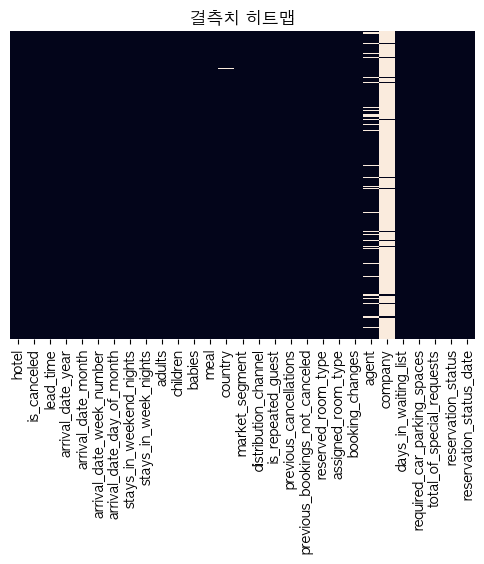

결측치 비율
company     94.306893
agent       13.686238
country      0.408744
children     0.003350
dtype: float64


In [2]:
import pycountry
# pycountry.countries.get(alpha_3='KOR')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from matplotlib import rc  ### 이 줄과
rc('font', family='AppleGothic') 			## 이 두 줄을 
plt.rcParams['axes.unicode_minus'] = False  ## 추가해줍니다. 
pd.set_option('future.no_silent_downcasting', True)


# read dataset
df = pd.read_csv("./hotel_data_modified.csv")

def 결측치_히트맵():
  # 히트맵 시각화
  plt.figure(figsize=(6, 4))
  sns.heatmap(df.isnull(), yticklabels=False, cbar=False)
  plt.title("결측치 히트맵")
  plt.show()

  print("결측치 비율")
  print((df.isnull().mean() * 100).pipe(lambda s: s[s > 0].sort_values(ascending=False)))

df.info()

결측치_히트맵()


## 전처리

### 열 이름 한글 처리

먼저 가독성을 높이기 위해 열 이름을 한글로 변경합니다.

          호텔 이름  취소여부  예약-도착일  호텔 도착(년) 호텔 도착(월)  호텔 도착(주)  호텔 도착(일)  주말 일수  \
0  Resort Hotel     0     342      2015     July        27         1      0   
1  Resort Hotel     0     737      2015     July        27         1      0   
2  Resort Hotel     0       7      2015     July        27         1      0   
3  Resort Hotel     0      13      2015     July        27         1      0   
4  Resort Hotel     0      14      2015     July        27         1      0   

   주중 일수  어른 수  ...  예약 룸  배정 룸 예약 변경 수    여행사 회사/단체 예약확정 대기일수  주차 요구 공간 수  \
0      0     2  ...     C     C       3    NaN   NaN         0           0   
1      0     2  ...     C     C       4    NaN   NaN         0           0   
2      1     1  ...     A     C       0    NaN   NaN         0           0   
3      1     1  ...     A     A       0  304.0   NaN         0           0   
4      2     2  ...     A     A       0  240.0   NaN         0           0   

   특별 요청 건수         상태         수정일  
0         0  Check-

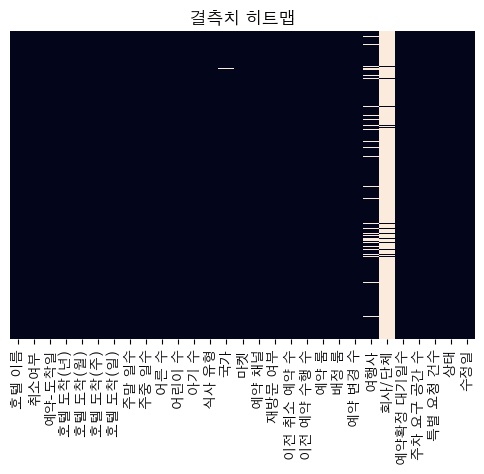

결측치 비율
회사/단체    94.306893
여행사      13.686238
국가        0.408744
어린이 수     0.003350
dtype: float64


In [3]:
eng_to_kor_dict = {
    "hotel": "호텔 이름",
    "is_canceled": "취소여부",
    "lead_time": "예약-도착일",
    "arrival_date_year": "호텔 도착(년)",
    "arrival_date_month": "호텔 도착(월)",
    "arrival_date_week_number": "호텔 도착(주)",
    "arrival_date_day_of_month": "호텔 도착(일)",
    "stays_in_weekend_nights": "주말 일수",
    "stays_in_week_nights": "주중 일수",
    "adults": "어른 수",
    "children": "어린이 수",
    "babies": "아기 수",
    "meal": "식사 유형",
    "country": "국가",
    "market_segment": "마켓",
    "distribution_channel": "예약 채널",
    "is_repeated_guest": "재방문 여부",
    "previous_cancellations": "이전 취소 예약 수",
    "previous_bookings_not_canceled": "이전 예약 수행 수",
    "reserved_room_type": "예약 룸",
    "assigned_room_type": "배정 룸",
    "booking_changes": "예약 변경 수",
    "agent": "여행사",
    "company": "회사/단체",
    "days_in_waiting_list": "예약확정 대기일수",
    "required_car_parking_spaces": "주차 요구 공간 수",
    "total_of_special_requests": "특별 요청 건수",
    "reservation_status": "상태",
    "reservation_status_date": "수정일",
}
df.rename(columns=eng_to_kor_dict, inplace=True)
print(df.head())

결측치_히트맵()

### 맥락에 맞게 형 변환

호텔 도착(월) 열은 문자로 되어 있으므로, 월을 숫자로 변환합니다.

<br />
어린이 수 열은 소수점으로 되어 있으므로 어른 수와 아이 수 열과 같은 정수로 변환합니다.

In [4]:
def month_to_int(month):
    month_dict = {
        'January': 1, 'February': 2, 'March': 3, 'April': 4,
        'May': 5, 'June': 6, 'July': 7, 'August': 8,
        'September': 9, 'October': 10, 'November': 11, 'December': 12
    }
    if isinstance(month, str): return month_dict.get(month, 0)
    elif isinstance(month, int): return month
    else: return 0

df['호텔 도착(월)'] = df['호텔 도착(월)'].map(month_to_int).astype('Int64')

df['어린이 수'].unique()
df['어린이 수'] = df['어린이 수'].astype('Int64')

방 타입 열과 식사 유형 열의 비교를 쉽게하기 위해 타입을 변경합니다.




In [5]:
def meal_to_int(meal):
    meal_dict = {
        'SC': 1, 'BB': 2, 'HB': 3, 'FB': 4, 'Undefined': 1
    }
    if isinstance(meal, str): return meal_dict.get(meal, 0)
    elif isinstance(meal, int): return meal
    else: return 0

print(df['식사 유형'].unique())
print(df['식사 유형'].value_counts())

df['식사 유형'] = df['식사 유형'].map(meal_to_int).astype('Int64')

['BB' 'FB' 'HB' 'SC' 'Undefined']
식사 유형
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64


In [6]:
def room_to_int(room):
    room_dict = {
        'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'K': 10, 'L': 11, 'P': 12
    }
    if isinstance(room, str): return room_dict.get(room, 0)
    elif isinstance(room, int): return room
    else: return 0

print(df['예약 룸'].unique())
print(df['배정 룸'].unique())

df['예약 룸'] = df['예약 룸'].map(room_to_int).astype('Int64')
df['배정 룸'] = df['배정 룸'].map(room_to_int).astype('Int64')


['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']
['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'P' 'L' 'K']


### 중복값 제거

중복값이 전체의 27.7%를 차지하고 있는 것을 확인할 수 있습니다.

In [7]:
# 중복값 확인
print(f"중복 비율: {df.duplicated().mean() * 100:.2f}%")
# 중복값 제거
df.drop_duplicates(inplace=True)

중복 비율: 27.73%


### 결손값 처리

여행사 열과 회사/단체 열을 확인해 보니, 숫자 형태의 ID로 되어 있는 것을 확인할 수 있습니다.
<br />
여행사를 통하지 않거나, 개인 고객인 경우 각 열에 대한 정보가 없기 때문에 결측치를 0으로 대체합니다.
<br />
<br />

In [8]:
print('여행사를 통하지 않은 예약 수:', len(df[df['여행사'].isnull() == True]), '| 평균 결측치:', df['여행사'].isnull().mean() * 100, '%')
print('회사/단체 가 아닌 예약 수:', len(df[df['회사/단체'].isnull() == True]), '| 평균 결측치:', df['회사/단체'].isnull().mean() * 100, '%')

df['여행사'] = df['여행사'].fillna(0)
df['회사/단체'] = df['회사/단체'].fillna(0)

여행사를 통하지 않은 예약 수: 11988 | 평균 결측치: 13.89317046600299 %
회사/단체 가 아닌 예약 수: 81115 | 평균 결측치: 94.00604957873145 %


어린이 수 열과 국가열의 결측치, 마켓열의 값 중 'Undefined'는 제거합니다.

In [9]:
print('국가가 없는 예약 수:', len(df[df['국가'].isnull() == True]), '| 평균 결측치:', df['국가'].isnull().mean() * 100, '%')
print('어린이 수:', len(df[df['어린이 수'].isnull() == True]), '| 평균 결측치:', df['어린이 수'].isnull().mean() * 100, '%')
print('마켓:', len(df[df['마켓'] == 'Undefined']), '| 평균 결측치:', len(df[df['마켓'] == 'Undefined']) / len(df[df['마켓'] != 'Undefined']) * 100, '%')

df.drop(df[df['어린이 수'].isnull()].index, inplace=True)
df.drop(df[df['국가'].isnull()].index, inplace=True)
df.drop(df[df['마켓'] == 'Undefined'].index, inplace=True)

국가가 없는 예약 수: 451 | 평균 결측치: 0.522674331011624 %
어린이 수: 4 | 평균 결측치: 0.004635692514515512 %
마켓: 2 | 평균 결측치: 0.00231789998261575 %


### 취소여부 열과 다른 열과의 상관관계


#### 수치형 변수 간 상관관계

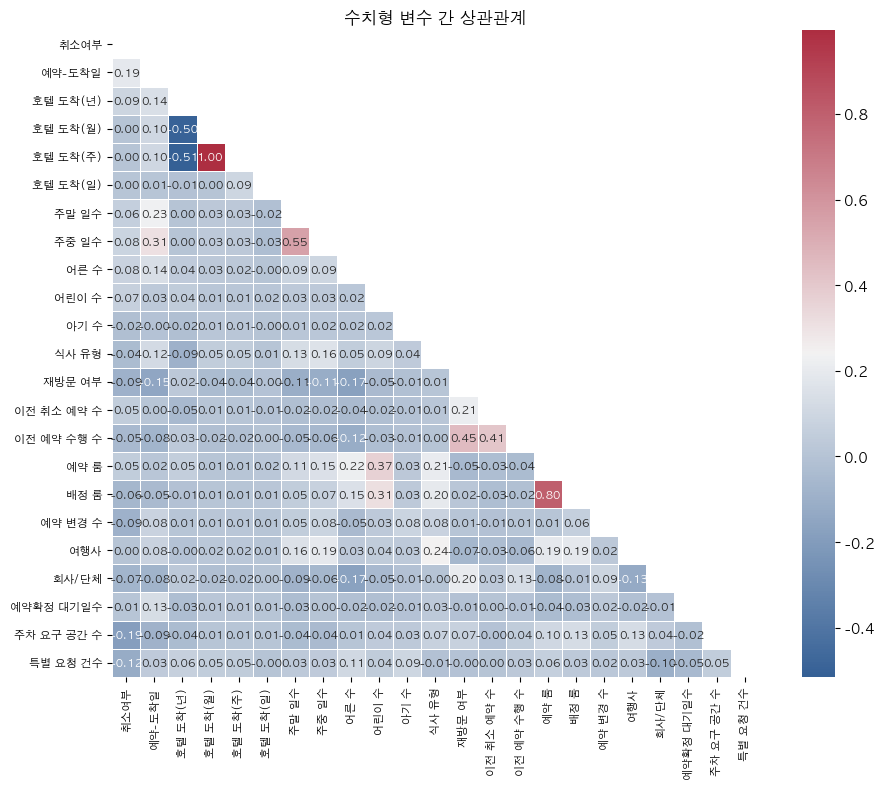

예약-도착일        0.190540
호텔 도착(년)      0.088766
주중 일수         0.084855
어른 수          0.079623
어린이 수         0.066266
주말 일수         0.060618
이전 취소 예약 수    0.050028
예약 룸          0.046565
예약확정 대기일수     0.005631
호텔 도착(일)      0.004967
호텔 도착(월)      0.003106
호텔 도착(주)      0.000822
여행사           0.000177
아기 수         -0.021051
식사 유형        -0.037309
이전 예약 수행 수   -0.051161
배정 룸         -0.063172
회사/단체        -0.073922
재방문 여부       -0.091302
예약 변경 수      -0.094046
특별 요청 건수     -0.123974
주차 요구 공간 수   -0.185277
Name: 취소여부, dtype: float64


In [10]:
# 수치형 변수만 추출
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# is_canceled 포함하여 상관계수 계산
correlation_matrix = df[numeric_cols].corr()

# is_canceled과 다른 변수들 간의 상관계수만 추출 (내림차순 정렬)
# 보기 좋게 출력

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
cmap = sns.diverging_palette(250, 7, s=75, l=40, n=5, center="light", as_cmap=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, annot=True, fmt=".2f", square=True, linewidths=0.5, annot_kws={"size": 8})
plt.title("수치형 변수 간 상관관계")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()

print(correlation_matrix['취소여부'].drop('취소여부').sort_values(ascending=False))

### 이상치 처리


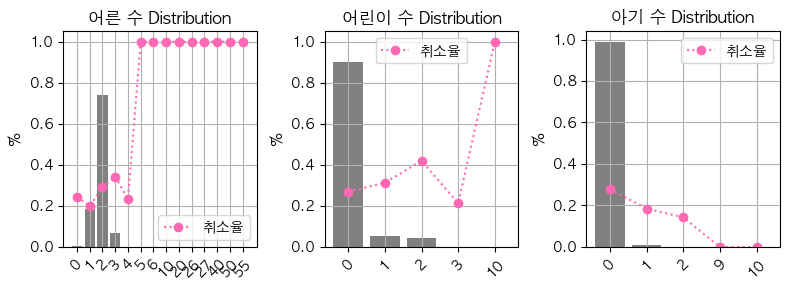

In [11]:
def 수치형이상치(label, subplot):
    data = df.groupby(label)[[label, '취소여부']].agg({label: 'count', '취소여부': 'mean'})
    plt.subplot(subplot)

    # 히스토그램: x는 label, y는 'sum' (혹은 count)
    sns.barplot(x=range(len(data.index)), y=data[label] / df[label].count() , color='gray')

    # 라인플롯: x는 '어른 수', y는 취소율(mean)
    plt.plot(range(len(data.index)), data['취소여부'], 'o:', color='hotpink', label='취소율')
    plt.title(f'{label} Distribution')
    plt.xticks(ticks=range(len(data.index)), labels=data.index.astype(str), rotation=45)
    plt.ylabel('%')
    plt.legend()
    plt.grid(True)

plt.figure(figsize=(8, 3))

수치형이상치('어른 수', 131)
수치형이상치('어린이 수', 132)
수치형이상치('아기 수', 133)

plt.tight_layout()
plt.show()

#### 예약자 수 이상치
어른 / 어린이 / 아기 값이 0 인 예약 161건을 제거합니다.

In [12]:
print('예약자가 없는 예약 수', len(df[(df['어른 수'] == 0) & (df['어린이 수'] == 0) & (df['아기 수'] == 0)]))
df.drop(df[(df['어른 수'] == 0) & (df['어린이 수'] == 0) & (df['아기 수'] == 0)].index, inplace=True)

print('어른이 없는 예약 수:', len(df[(df['어른 수'] == 0)]))
print('아기만 예약한 수', len(df[(df['어른 수'] == 0) & (df['어린이 수'] == 0)]))
print('어린이만 예약한 수', len(df[(df['어른 수'] == 0) & (df['아기 수'] == 0)]))

예약자가 없는 예약 수 161
어른이 없는 예약 수: 217
아기만 예약한 수 0
어린이만 예약한 수 214


어른수가 20명 이상인 예약건은 제거합니다.


In [13]:
print(df.groupby('어른 수')['어른 수'].sum())
print(df.groupby('어린이 수')['어린이 수'].sum())
print(df.groupby('아기 수')['아기 수'].sum())

df.drop(df[df['어른 수'] >= 20].index, inplace=True)


어른 수
0          0
1      15931
2     127070
3      17736
4        240
5         10
6          6
10        10
20        40
26       130
27        54
40        40
50        50
55        55
Name: 어른 수, dtype: int64
어린이 수
0        0
1     4669
2     7156
3      225
10      10
Name: 어린이 수, dtype: Int64
아기 수
0       0
1     894
2      28
9       9
10     10
Name: 아기 수, dtype: int64


## 취소 요인 분석

### 전체 대비 예약 취소 수

전체 호텔 데이터를 기준으로, **전체 예약 건수 대비 예약 취소 비율은 약 28%**로 나타났습니다.
호텔 유형별로 비교했을 때, City Hotel이 Resort Hotel보다 더 높은 취소율을 보이는 경향이 확인됩니다.

##### 인사이트
- 전체 평균 취소율은 27.82%, 즉 약 4건 중 1건 이상이 취소됩니다.
- **City Hotel의 취소율은 30.23%**로 전체 평균보다 높고, 반대로 **Resort Hotel의 취소율은 23.94%**로 상대적으로 낮은 수준입니다.
- 각 호텔 유형 모두 취소 수 대비 예약 수가 많지만, City Hotel은 취소율이 30%를 초과하며 관리 필요성이 더 큽니다.

##### 결론
이 결과는 호텔 유형에 따라 고객의 예약 행동에 차이가 있음을 보여주며, 특히 City Hotel의 경우 취소 가능성을 고려한 유연한 예약 정책이나 사전 리마인드 캠페인이 더 중요한 전략이 될 수 있습니다.

(85659, 29)
호텔명 | 예약 수 | 예약 취소 수 | 예약 취소율
전체:  85659 23828 27.82 %
Resort Hotel:  25028 7879 23.94 %
City Hotel:  36803 15949 30.23 %


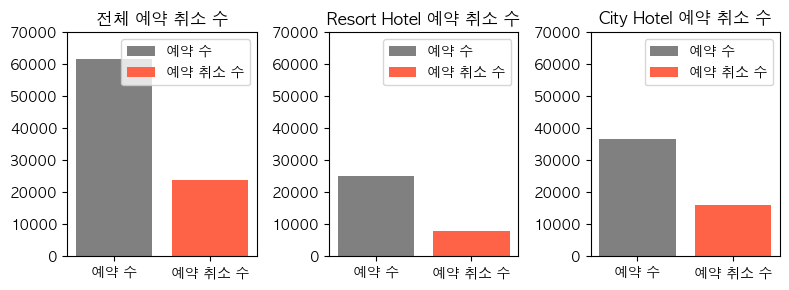

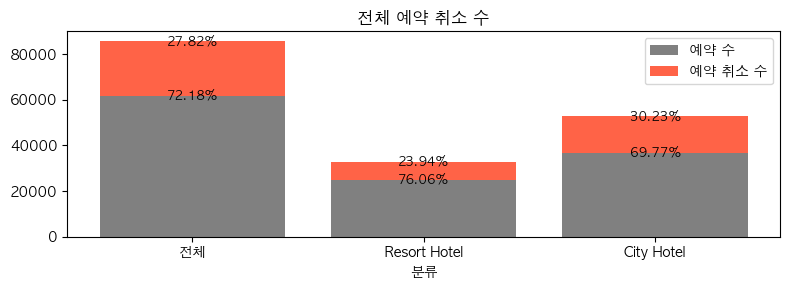

In [14]:
import math

# 총 갯수
print(df.shape)
print('호텔명', '|', '예약 수', '|', '예약 취소 수', '|', '예약 취소율')
print('전체: ', df.count()['취소여부'], df[df['취소여부'] == 1].count()['취소여부'], round(df[df['취소여부'] == 1].count()['취소여부'] / df.count()['취소여부'] * 100, 2), '%')
print('Resort Hotel: ', df[(df['호텔 이름'] == 'Resort Hotel') & (df['취소여부'] != 1)].count()['취소여부'], df[(df['호텔 이름'] == 'Resort Hotel') & (df['취소여부'] == 1)].count()['취소여부'], round(df[(df['호텔 이름'] == 'Resort Hotel') & (df['취소여부'] == 1)].count()['취소여부'] / df[(df['호텔 이름'] == 'Resort Hotel')].count()['취소여부'] * 100, 2), '%')
print('City Hotel: ', df[(df['호텔 이름'] != 'Resort Hotel') & (df['취소여부'] != 1)].count()['취소여부'], df[(df['호텔 이름'] != 'Resort Hotel') & (df['취소여부'] == 1)].count()['취소여부'], round(df[(df['호텔 이름'] != 'Resort Hotel') & (df['취소여부'] == 1)].count()['취소여부'] / df[(df['호텔 이름'] != 'Resort Hotel')].count()['취소여부'] * 100, 2), '%')

hotels = df['호텔 이름'].unique()

colors = ['gray', 'tomato']

plt.figure(figsize=(8, 3))

for i, hotel in enumerate(hotels):
  subset = df[df['호텔 이름'] == hotel]
  counts = subset['취소여부'].value_counts().sort_index()  # 0: not canceled, 1: canceled

  plt.subplot(1, 3, i + 2)
  plt.bar(['예약 수', '예약 취소 수'], counts, color=colors, label=['예약 수', '예약 취소 수'])
  plt.yticks(range(0, (math.ceil(df['취소여부'].value_counts().sort_index()[0]/10000) * 10000) + 1, 10000))
  plt.title(f"{hotel} 예약 취소 수")
  plt.legend()
  # total = counts.sum()
  # for j, val in enumerate(counts):
  #   rate = val / total
  #   plt.text(j, val, f"{rate:.2%}", ha='center', va='center', color='black', fontsize=9)


plt.subplot(1, 3, 1)
plt.bar(['예약 수', '예약 취소 수'], df['취소여부'].value_counts().sort_index(), color=colors, label=['예약 수', '예약 취소 수'])

# for i, val in enumerate(df['취소여부'].value_counts()):
#   rate = val / df['취소여부'].value_counts().sum()
#   plt.text(i, val, f"{rate:.2%}", ha='center', va='center', color='black', fontsize=9)

plt.yticks(range(0, (math.ceil(df['취소여부'].value_counts().sort_index()[0]/10000) * 10000) + 1, 10000))
plt.title('전체 예약 취소 수')

plt.legend()

plt.tight_layout()
plt.show()

# 한눈에 보기
colors = ['#409df5', 'tomato']

cancel_df = df[df['취소여부'] > 0].reset_index()
not_cancel_df = df[df['취소여부'] == 0].reset_index()

plt.figure(figsize=(8, 3))

plt.bar(
  ['전체', 'Resort Hotel', 'City Hotel'],
  [
    not_cancel_df['취소여부'].value_counts()[0],
    not_cancel_df[not_cancel_df['호텔 이름'] == 'Resort Hotel']['취소여부'].value_counts()[0],
    not_cancel_df[not_cancel_df['호텔 이름'] != 'Resort Hotel']['취소여부'].value_counts()[0]
  ],
  color='gray',
  label='예약 수'
)

plt.text(1, df[df['호텔 이름'] == 'Resort Hotel']['취소여부'].value_counts().sum(), f"{cancel_df[cancel_df['호텔 이름'] == 'Resort Hotel']['취소여부'].value_counts()[1]/(not_cancel_df[not_cancel_df['호텔 이름'] == 'Resort Hotel']['취소여부'].value_counts()[0] + cancel_df[cancel_df['호텔 이름'] == 'Resort Hotel']['취소여부'].value_counts()[1]):.2%}", ha='center', va='center', color='black', fontsize=9)
plt.text(1, not_cancel_df[not_cancel_df['호텔 이름'] == 'Resort Hotel']['취소여부'].value_counts().sum(), f"{not_cancel_df[not_cancel_df['호텔 이름'] == 'Resort Hotel']['취소여부'].value_counts().sum()/df[df['호텔 이름'] == 'Resort Hotel']['취소여부'].value_counts().sum():.2%}", ha='center', va='center', color='black', fontsize=9)

plt.text(2, df[df['호텔 이름'] != 'Resort Hotel']['취소여부'].value_counts().sum(), f"{cancel_df[cancel_df['호텔 이름'] != 'Resort Hotel']['취소여부'].value_counts()[1]/(not_cancel_df[not_cancel_df['호텔 이름'] != 'Resort Hotel']['취소여부'].value_counts()[0] + cancel_df[cancel_df['호텔 이름'] != 'Resort Hotel']['취소여부'].value_counts()[1]):.2%}", ha='center', va='center', color='black', fontsize=9)
plt.text(2, not_cancel_df[not_cancel_df['호텔 이름'] != 'Resort Hotel']['취소여부'].value_counts().sum(), f"{not_cancel_df[not_cancel_df['호텔 이름'] != 'Resort Hotel']['취소여부'].value_counts().sum()/df[df['호텔 이름'] != 'Resort Hotel']['취소여부'].value_counts().sum():.2%}", ha='center', va='center', color='black', fontsize=9)

plt.bar(
  ['전체', 'Resort Hotel', 'City Hotel'],
  [
    cancel_df['취소여부'].value_counts()[1],
    cancel_df[cancel_df['호텔 이름'] == 'Resort Hotel']['취소여부'].value_counts()[1],
    cancel_df[cancel_df['호텔 이름'] != 'Resort Hotel']['취소여부'].value_counts()[1]
  ],
  bottom=[
    not_cancel_df['취소여부'].value_counts()[0],
    not_cancel_df[not_cancel_df['호텔 이름'] == 'Resort Hotel']['취소여부'].value_counts()[0],
    not_cancel_df[not_cancel_df['호텔 이름'] != 'Resort Hotel']['취소여부'].value_counts()[0]
  ],
  color='tomato',
  label='예약 취소 수'
)

plt.text(0, df['취소여부'].value_counts().sum(), f"{cancel_df['취소여부'].value_counts()[1]/(not_cancel_df['취소여부'].value_counts()[0] + cancel_df['취소여부'].value_counts()[1]):.2%}", ha='center', va='center', color='black', fontsize=9)
plt.text(0, not_cancel_df['취소여부'].value_counts().sum(), f"{df['취소여부'].value_counts()[0] / df['취소여부'].value_counts().sum():.2%}", ha='center', va='center', color='black', fontsize=9)

plt.title('전체 예약 취소 수')
plt.xlabel('분류')
plt.legend()

plt.tight_layout()
plt.show()

### 가설 검증

취소 요인 분석을 위해 가설을 세워보았습니다.

#### 가설 1. 예약 확정까지의 대기 일 수가 길수록 취소율이 높을 것이다.

고객이 예약을 확정하기까지 대기 시간이 길어진다는 것은 호텔의 가용 여부나 고객의 불확실성 등 외부 요인이 개입했을 가능성이 높고, 이에 따라 취소율 또한 증가할 수 있다는 가설을 세웠습니다.
<br />
시각화 결과에 따르면 전체적으로 예약 확정까지의 대기일이 길수록 취소율이 증가하는 경향이 뚜렷하게 관찰됩니다. 특히 City Hotel의 경우 대기일이 긴 구간에서의 취소율이 매우 높게 나타났습니다.
<br /><br />

##### 인사이트
- 전체 호텔 기준으로, **대기일 0일(즉시 확정)**의 경우 예약 수가 압도적으로 많고 취소율은 약 28% 수준입니다.
- 그러나 대기일이 1년 이상으로 넘어가는 구간부터 취소율이 75%까지 급격히 상승합니다.
- City Hotel의 경우, 8~14일 대기 구간에서 취소율은 65%, 365일 이상 구간에서는 무려 75%에 달하는 매우 높은 취소율을 보였습니다.
- 반면 Resort Hotel은 전체적으로 취소율이 0~30% 범위에서 안정적으로 유지되는 경향을 보였습니다.
- 대기일이 있음에도 예약을 확정한 고객은 일반적으로 높은 의지를 갖고 있는 경우가 많다고 볼 수 있지만, 대기일이 너무 길 경우 다시 취소되는 비율이 급격히 증가합니다.

##### 결론
이 결과는 호텔 측에서 대기 고객을 빠르게 확정시킬 수 있는 전략이 예약 유지율을 높이는 데 매우 중요하다는 것을 보여줍니다. 특히 City Hotel에서는 대기일이 1주 이상일 경우 빠른 대응이 필요합니다.

##### 전체 구간별 예약 취소율

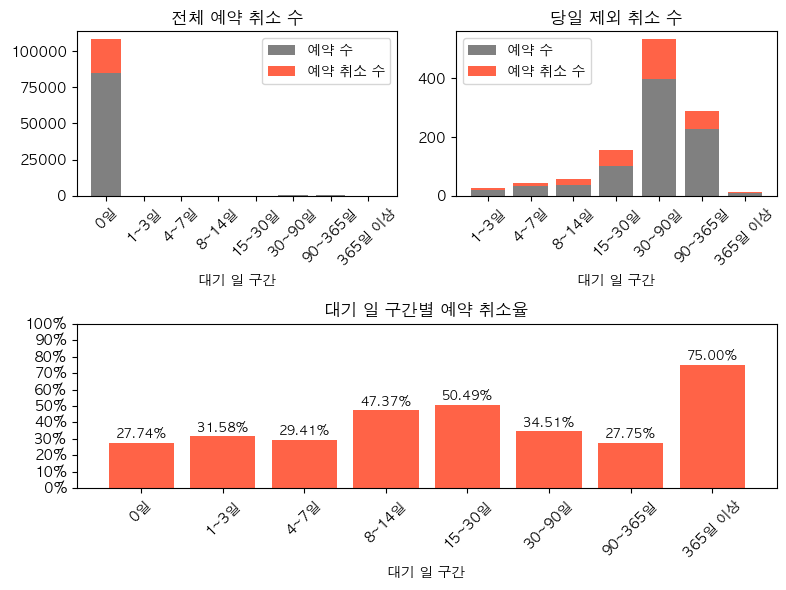

waiting_bin
0일         23536
15~30일        52
1~3일           6
30~90일       137
365일 이상        6
4~7일          10
8~14일         18
90~365일       63
Name: 취소여부, dtype: int64
waiting_bin
0일         27.743920
15~30일     50.485437
1~3일       31.578947
30~90일     34.508816
365일 이상    75.000000
4~7일       29.411765
8~14일      47.368421
90~365일    27.753304
Name: 취소여부, dtype: float64


In [15]:
# 대기 일 수 구간 만들기
waiting_range = ["0일", "1~3일", "4~7일", "8~14일", "15~30일", "30~90일", "90~365일", "365일 이상"]
def waiting_bin(days):
    if days == 0:
        return "0일"
    elif days <= 3:
        return "1~3일"
    elif days <= 7:
        return "4~7일"
    elif days <= 14:
        return "8~14일"
    elif days <= 30:
        return "15~30일"
    elif days <= 90:
        return "30~90일"
    elif days <= 365:
        return "90~365일"
    else:
        return "365일 이상"

new_df = df.copy() # 깊은 복사로 원본은 유지
new_df['waiting_bin'] = new_df['예약확정 대기일수'].apply(waiting_bin)

# 한눈에 보기
plt.figure(figsize=(8, 6))

# 대기 일 구간별 예약 수와 취소 수 시각화
plt.subplot(2, 2, 1)
plt.bar(
    waiting_range,
    [new_df[new_df['waiting_bin'] == r]['취소여부'].count() for r in waiting_range],
    color='gray',
    label='예약 수'
)
plt.bar(
    waiting_range,
    [new_df[new_df['waiting_bin'] == r]['취소여부'].sum() for r in waiting_range],
    bottom=[new_df[new_df['waiting_bin'] == r]['취소여부'].count() for r in waiting_range],
    color='tomato',
    label='예약 취소 수'
)
plt.title('전체 예약 취소 수')
plt.xlabel('대기 일 구간')
plt.xticks(rotation=45)
plt.legend()

# 대기 일 구간별 예약 수와 취소 수 시각화 (당일 제외)
plt.subplot(2, 2, 2)
plt.bar(
    waiting_range[1:],
    [new_df[new_df['waiting_bin'] == r]['취소여부'].count() for r in waiting_range[1:]],
    color='gray',
    label='예약 수'
)
plt.bar(
    waiting_range[1:],
    [new_df[new_df['waiting_bin'] == r]['취소여부'].sum() for r in waiting_range[1:]],
    bottom=[new_df[new_df['waiting_bin'] == r]['취소여부'].count() for r in waiting_range[1:]],
    color='tomato',
    label='예약 취소 수'
)
plt.title('당일 제외 취소 수')
plt.xlabel('대기 일 구간')
plt.xticks(rotation=45)
plt.legend()

# 대기 일 구간별 예약 취소율 시각화
plt.subplot(2, 1, 2)
plt.bar(
    waiting_range,
    [new_df[new_df['waiting_bin'] == r]['취소여부'].mean() for r in waiting_range],
    color='tomato',
)
plt.title('대기 일 구간별 예약 취소율')
plt.xlabel('대기 일 구간')
plt.yticks(np.arange(0, 1.1, 0.1), [f"{int(i*100)}%" for i in np.arange(0, 1.1, 0.1)])
for i, v in enumerate([new_df[new_df['waiting_bin'] == r]['취소여부'].mean() for r in waiting_range]):
    val = 0 if math.isnan(v) else v
    plt.text(i, val + 0.02, f"{val:.2%}", ha='center', va='bottom', fontsize=9)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 검증
print(new_df.groupby('waiting_bin')['취소여부'].sum())
print(new_df.groupby('waiting_bin')['취소여부'].mean() * 100)

##### 호텔별 대기 일 구간별 전체 예약 수와 예약 취소율

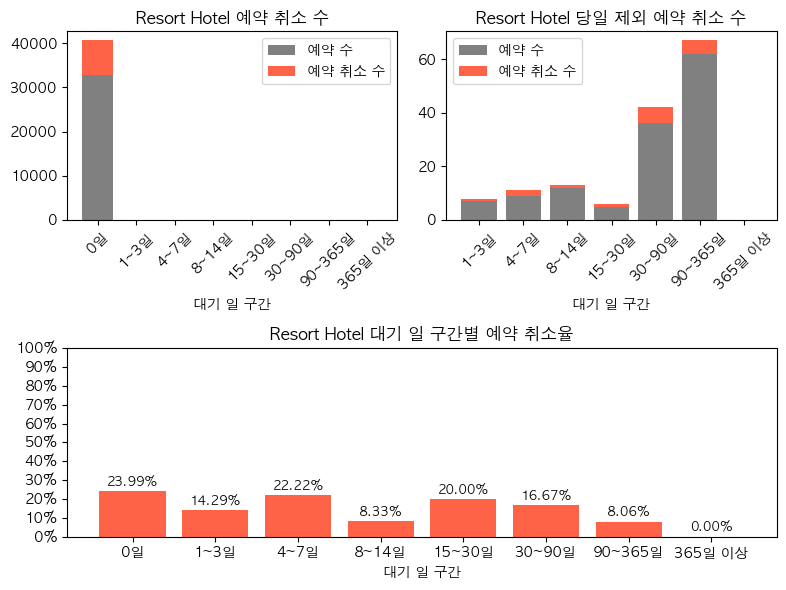

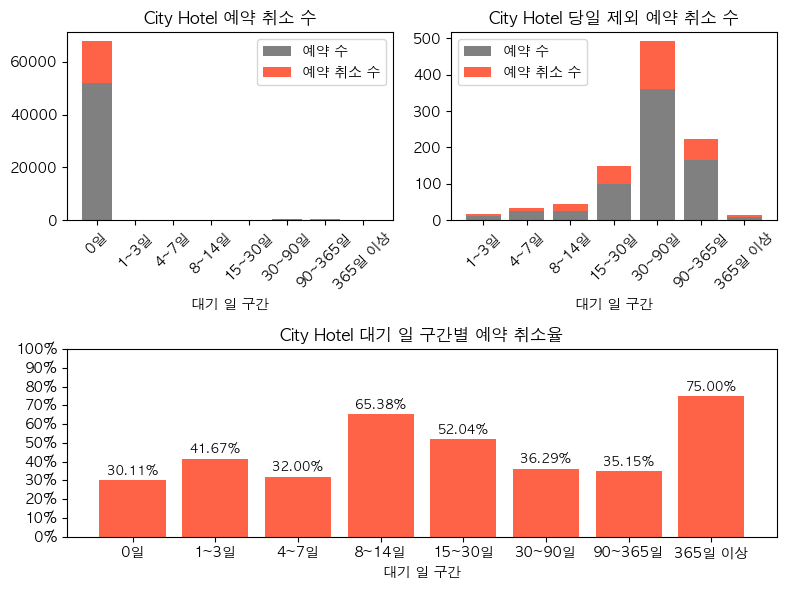

In [16]:
# 호텔별 대기 일 구간별 예약 수와 취소 수 시각화
for i, hotel in enumerate(hotels):
    plt.figure(figsize=(8, 6))
    plt.subplot(2, 2, 1)
    hotel_df = new_df[new_df['호텔 이름'] == hotel]
    plt.bar(
        waiting_range,
        [hotel_df[hotel_df['waiting_bin'] == r]['취소여부'].count() for r in waiting_range],
        color='gray',
        label='예약 수'
    )
    plt.bar(
        waiting_range,
        [hotel_df[hotel_df['waiting_bin'] == r]['취소여부'].sum() for r in waiting_range],
        bottom=[hotel_df[hotel_df['waiting_bin'] == r]['취소여부'].count() for r in waiting_range],
        color='tomato',
        label='예약 취소 수'
    )
    plt.title(f'{hotel} 예약 취소 수')
    plt.xlabel('대기 일 구간')
    plt.xticks(rotation=45)
    plt.legend()

    # 호텔별 대기 일 구간별 예약 수와 취소 수 시각화 (당일 제외)
    plt.subplot(2, 2, 2)
    hotel_df = new_df[new_df['호텔 이름'] == hotel]
    plt.bar(
        waiting_range[1:],
        [hotel_df[hotel_df['waiting_bin'] == r]['취소여부'].count() for r in waiting_range[1:]],
        color='gray',
        label='예약 수'
    )
    plt.bar(
        waiting_range[1:],
        [hotel_df[hotel_df['waiting_bin'] == r]['취소여부'].sum() for r in waiting_range[1:]],
        bottom=[hotel_df[hotel_df['waiting_bin'] == r]['취소여부'].count() for r in waiting_range[1:]],
        color='tomato',
        label='예약 취소 수'
    )
    plt.title(f'{hotel} 당일 제외 예약 취소 수')
    plt.xlabel('대기 일 구간')
    plt.xticks(rotation=45)
    plt.legend()

    plt.subplot(2, 1, 2)
    # 호텔별 대기 일 구간별 예약 취소율 시각화
    plt.bar(
        waiting_range,
        [0 if math.isnan(hotel_df[hotel_df['waiting_bin'] == r]['취소여부'].mean()) else hotel_df[hotel_df['waiting_bin'] == r]['취소여부'].mean() for r in waiting_range],
        color='tomato'
    )
    plt.title(f'{hotel} 대기 일 구간별 예약 취소율')
    plt.xlabel('대기 일 구간')
    plt.yticks(np.arange(0, 1.1, 0.1), [f"{int(i*100)}%" for i in np.arange(0, 1.1, 0.1)])
    for i, v in enumerate([hotel_df[hotel_df['waiting_bin'] == r]['취소여부'].mean() for r in waiting_range]):
        val = 0 if math.isnan(v) else v
        plt.text(i, val + 0.02, f"{val:.2%}", ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()



#### 가설 2. 예약 확정 후 도착일까지 남은 기간이 길수록 취소 확률이 높을 것이다.

고객이 호텔 예약을 확정한 이후 도착일까지 시간이 많을수록 계획 변경, 일정 취소, 대체 숙소 선택 등의 가능성이 높아져 예약 취소율이 증가할 것이라는 가설을 세웠습니다.
<br />
시각화 결과에 따르면 전체적으로 예약 확정 후 도착일까지의 대기일이 길어질수록 예약 수 자체도 증가하지만, 취소율 또한 꾸준히 상승하는 경향을 보였습니다.
<br /><br />

##### 인사이트
- 전체 호텔 기준으로, 예약-도착일까지 0~7일 이내인 경우 취소율은 10% 미만으로 매우 낮습니다.
- 반면 일주일 이상 남은 예약의 경우 취소율이 20% 초과해 이후 급격히 상승합니다.
- City Hotel은 특히 예약-도착일까지 일주일 이상의 경우 상대적으로 취소율이 높게 유지되는 되는것으로 보였습니다.
- Resort Hotel은 전반적으로 City Hotel보다 낮은 취소율을 유지하나, 동일하게 장기 예약일수록 취소율이 상승하는 경향을 보입니다.

##### 결론
이를 통해 예약 확정 시점과 도착일 간의 간격이 클수록, 고객의 예약 취소 가능성이 높아진다는 가설을 뒷받침할 수 있으며, 장기 예약 고객에 대한 리마인드 알림, 재확인 절차, 유연한 조건 설정 등이 실제 방문 전환율을 높이는 데 기여할 수 있음을 시사합니다.

##### 전체 구간별 예약 취소율

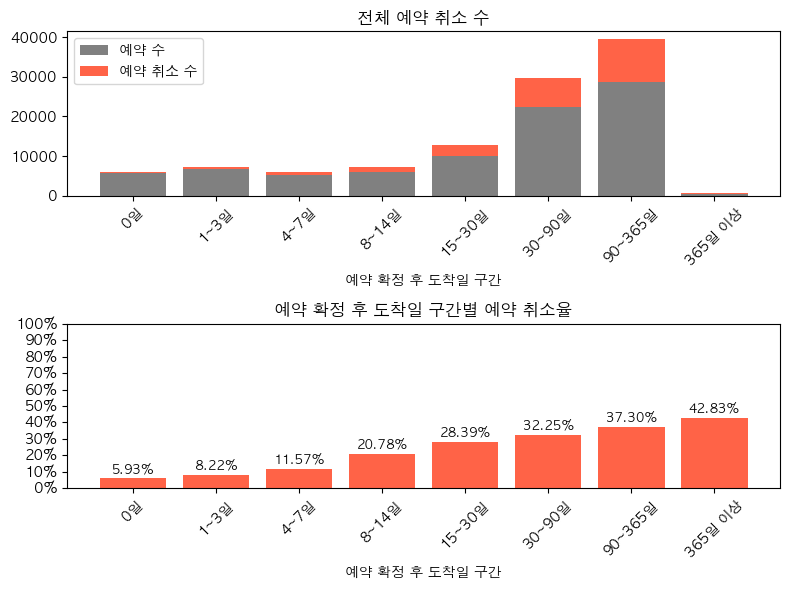

In [17]:
new_df['wait_arrival_bin'] = new_df['예약-도착일'].apply(waiting_bin)

# 한눈에 보기
plt.figure(figsize=(8, 6))

# 예약 확정 후 도착일 구간별 예약 수와 취소 수 시각화
plt.subplot(2, 1, 1)
plt.bar(
    waiting_range,
    [new_df[new_df['wait_arrival_bin'] == r]['취소여부'].count() for r in waiting_range],
    color='gray',
    label='예약 수'
)
plt.bar(
    waiting_range,
    [new_df[new_df['wait_arrival_bin'] == r]['취소여부'].sum() for r in waiting_range],
    bottom=[new_df[new_df['wait_arrival_bin'] == r]['취소여부'].count() for r in waiting_range],
    color='tomato',
    label='예약 취소 수'
)
plt.title('전체 예약 취소 수')
plt.xlabel('예약 확정 후 도착일 구간')
plt.xticks(rotation=45)
plt.legend()


# 예약 확정 후 도착일 구간별 예약 취소율 시각화
plt.subplot(2, 1, 2)
plt.bar(
    waiting_range,
    [new_df[new_df['wait_arrival_bin'] == r]['취소여부'].mean() for r in waiting_range],
    color='tomato',
)
plt.title('예약 확정 후 도착일 구간별 예약 취소율')
plt.xlabel('예약 확정 후 도착일 구간')
plt.yticks(np.arange(0, 1.1, 0.1), [f"{int(i*100)}%" for i in np.arange(0, 1.1, 0.1)])
for i, v in enumerate([new_df[new_df['wait_arrival_bin'] == r]['취소여부'].mean() for r in waiting_range]):
    val = 0 if math.isnan(v) else v
    plt.text(i, val + 0.02, f"{val:.2%}", ha='center', va='bottom', fontsize=9)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


##### 호텔별 예약 확정 후 도착일 구간별 예약 수와 취소율

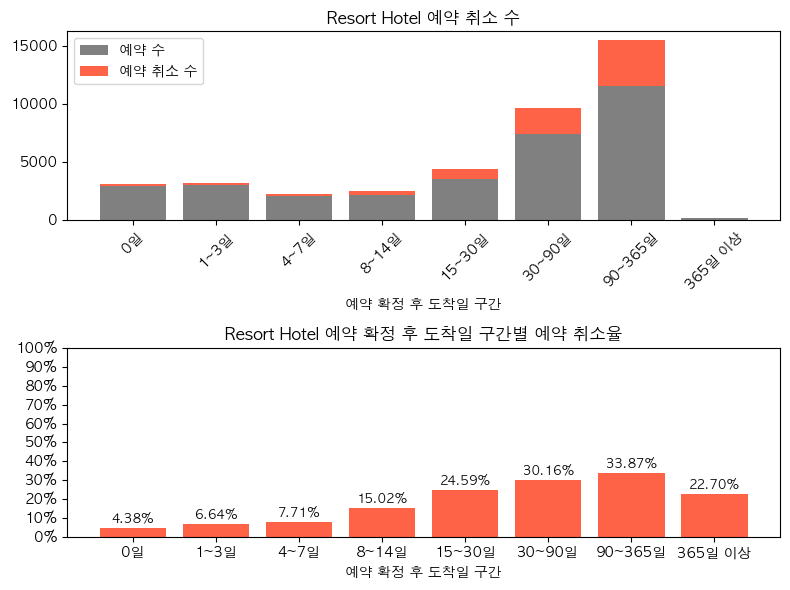

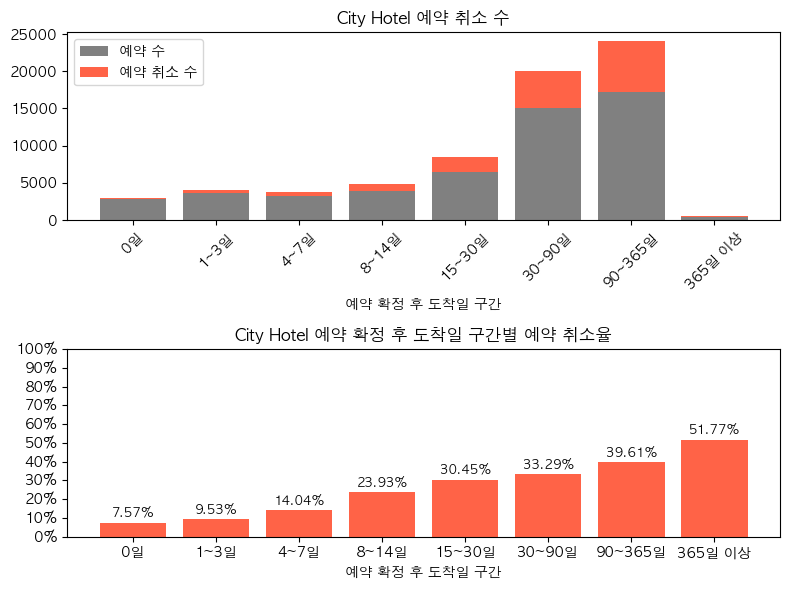

In [18]:
# 호텔별 예약 확정 후 도착일 구간별 예약 수와 취소 수 시각화
for i, hotel in enumerate(hotels):
    plt.figure(figsize=(8, 6))
    plt.subplot(2, 1, 1)
    hotel_df = new_df[new_df['호텔 이름'] == hotel]
    plt.bar(
        waiting_range,
        [hotel_df[hotel_df['wait_arrival_bin'] == r]['취소여부'].count() for r in waiting_range],
        color='gray',
        label='예약 수'
    )
    plt.bar(
        waiting_range,
        [hotel_df[hotel_df['wait_arrival_bin'] == r]['취소여부'].sum() for r in waiting_range],
        bottom=[hotel_df[hotel_df['wait_arrival_bin'] == r]['취소여부'].count() for r in waiting_range],
        color='tomato',
        label='예약 취소 수'
    )
    plt.title(f'{hotel} 예약 취소 수')
    plt.xlabel('예약 확정 후 도착일 구간')
    plt.xticks(rotation=45)
    plt.legend()

    plt.subplot(2, 1, 2)
    # 호텔별 예약 확정 후 도착일 구간별 예약 취소율 시각화
    plt.bar(
        waiting_range,
        [0 if math.isnan(hotel_df[hotel_df['wait_arrival_bin'] == r]['취소여부'].mean()) else hotel_df[hotel_df['wait_arrival_bin'] == r]['취소여부'].mean() for r in waiting_range],
        color='tomato'
    )
    plt.title(f'{hotel} 예약 확정 후 도착일 구간별 예약 취소율')
    plt.xlabel('예약 확정 후 도착일 구간')
    plt.yticks(np.arange(0, 1.1, 0.1), [f"{int(i*100)}%" for i in np.arange(0, 1.1, 0.1)])
    for i, v in enumerate([hotel_df[hotel_df['wait_arrival_bin'] == r]['취소여부'].mean() for r in waiting_range]):
        val = 0 if math.isnan(v) else v
        plt.text(i, val + 0.02, f"{val:.2%}", ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()



#### 가설 3. 재방문 고객은 취소율이 낮을 것이다.

이전에 숙박 경험이 있는 고객은 호텔 서비스에 대한 신뢰와 만족도가 높을 가능성이 있으며, 그에 따라 예약 취소 가능성이 낮을 것이라는 가설을 세웠습니다.
<br />
시각화 결과를 보면 전체 호텔, City Hotel, Resort Hotel 모두에서 재방문 고객의 비율은 매우 낮은 반면, 취소율은 일관되게 신규 고객보다 낮은 수준을 보이고 있습니다.

##### 인사이트
- 전체 호텔 기준으로 신규 고객이 전체의 96% 이상을 차지하며, 이들의 취소율은 약 28% 수준입니다.
- 반면 재방문 고객은 4% 미만이지만, 이들의 취소율은 약 5% 이하로 매우 낮은 수준을 보입니다.
- Resort Hotel, City Hotel 모두 같은 경향을 보이며, 재방문 고객은 일관되게 2% 미만의 취소율을 유지하는 것을 확인할 수 있습니다.
- 즉, 이전에 호텔을 이용한 경험이 있는 고객은 예약을 취소하지 않고 실제 방문할 확률이 높다는 것을 뒷받침합니다.

##### 결론
이는 호텔 마케팅 전략에 있어 충성 고객 확보의 중요성을 보여주는 지표이며, 리텐션 캠페인, 재방문 고객 혜택 제공, 멤버십 프로그램 등을 강화할 근거로 활용될 수 있습니다.

##### 재방문 대비 취소율

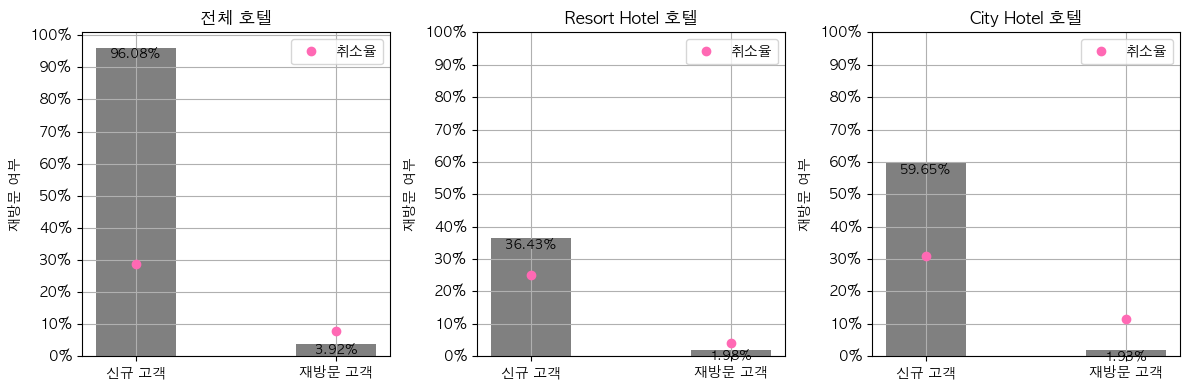

In [19]:
def 재방문여부_취소율(data, hotem_name, subplot):
    plt.subplot(subplot)

    sns.barplot(x=['신규 고객', '재방문 고객'], y=data['재방문 여부'] / df['재방문 여부'].count(), color='gray', width=0.4)
    plt.plot(['신규 고객', '재방문 고객'], data['취소여부'], 'o', color='hotpink', label='취소율')

    plt.yticks(np.arange(0, 1.1, 0.1), [f"{int(i*100)}%" for i in np.arange(0, 1.1, 0.1)])
    plt.legend()
    plt.title(f'{hotem_name} 호텔')
    plt.grid(True)

    for i, v in enumerate(data['재방문 여부']):
        val = v / df['재방문 여부'].count()
        plt.text(i, val, f"{val:.2%}", ha='center', va='top', fontsize=9, color='black')

plt.figure(figsize=(12, 4))

재방문여부_취소율(df.groupby('재방문 여부')[['재방문 여부', '취소여부']].agg({'재방문 여부': 'count', '취소여부': 'mean'}), '전체', 131)
재방문여부_취소율(df[df['호텔 이름'] == 'Resort Hotel'].groupby('재방문 여부')[['재방문 여부', '취소여부']].agg({'재방문 여부': 'count', '취소여부': 'mean'}), 'Resort Hotel', 132)
재방문여부_취소율(df[df['호텔 이름'] == 'City Hotel'].groupby('재방문 여부')[['재방문 여부', '취소여부']].agg({'재방문 여부': 'count', '취소여부': 'mean'}), 'City Hotel', 133)

plt.tight_layout()
plt.show()

#### 가설 4. 배정된 방이 예약된 방과 다를 경우, 취소율에 차이가 있을 것이다.

고객은 호텔 예약 시 특정한 방 유형을 기대하고 예약을 진행합니다.
이에 따라 배정된 방이 예약된 방과 다를 경우, 고객의 만족도나 취소 행동에 차이가 있을 것이라는 가설을 세웠습니다.
<br />
다만, 현재 데이터에서 ‘예약 룸’과 ‘배정 룸’은 카테고리형 데이터를 숫자로 임의 변환한 것으로,
그 차이(배정 룸 - 예약 룸)는 실제 방 등급의 상하를 반영하지 않으며,
업그레이드인지 다운그레이드인지 정확히 판단할 수 없습니다.
따라서 이번 분석은 방이 바뀌었는가 아닌가, 또는 방 타입 코드가 달랐을 때 취소율이 어떻게 변하는가에 초점을 맞춥니다.
<br /><br />
##### 인사이트
- 대부분의 예약에서 예약된 방과 배정된 방은 동일하지 않았으며, 이 경우 취소율은 약 10~20% 수준으로 낮게 나타났습니다.
- 반면 예약된 방과 배정된 방이 동일한 경우(room_diff = 0) 에는 예약 비율이 가장 높았으나, **취소율은 30% 이상으로 오히려 높았습니다.
- **방이 바뀐 경우(코드가 다름)**가 오히려 더 낮은 취소율을 보이는 경향이 전체, City Hotel, Resort Hotel 모두에서 유사하게 나타났습니다.
- 단, room_diff 값 자체가 업그레이드/다운그레이드를 의미하지 않기 때문에, 방 변경의 질적인 차이에 대한 해석은 불가능합니다.

##### 결론
룸이 바뀌었는지 여부는 고객 행동에 영향을 미칠 수 있으며,
사전 안내 여부나 변경 사유 관리가 취소율 관리에 중요한 변수로 작용할 수 있음을 시사합니다.

##### 원하던 방이 아닌 고객 분포

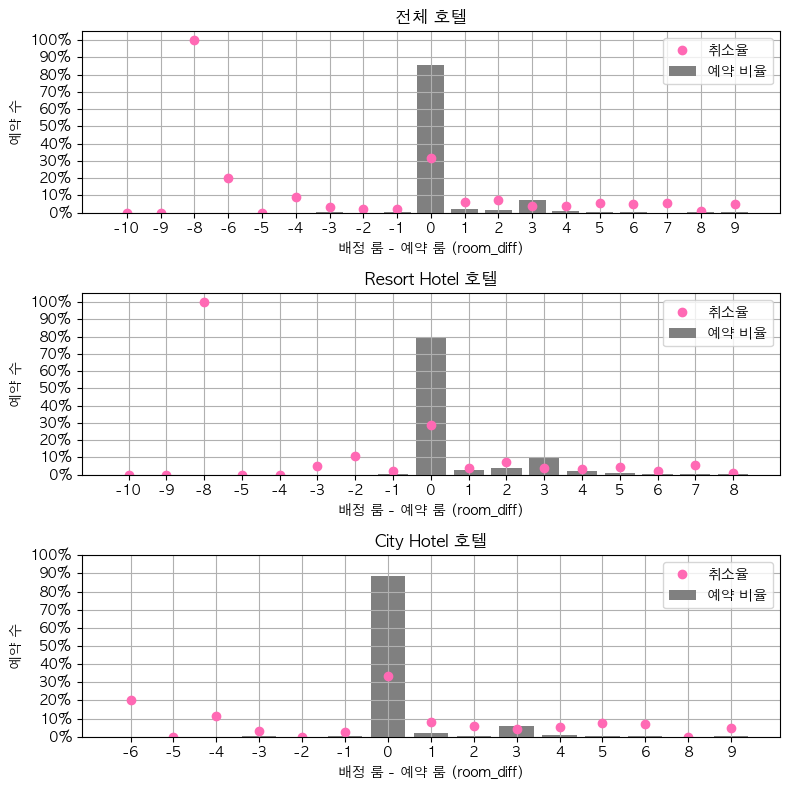

In [20]:
def 룸이바뀐고객의_취소율(hotel_name=None):
    ndf = df.copy()
    if hotel_name:
        ndf = ndf[ndf['호텔 이름'] == hotel_name]
    ndf['room_diff'] = ndf['배정 룸'] - ndf['예약 룸']
    # ndf.drop(ndf[ndf['room_diff'] == 0].index, inplace=True) # 차이가 없는 룸은 보지않음
    room_diff_summary = ndf.groupby('room_diff')[['room_diff','취소여부']].agg({'room_diff': 'count', '취소여부': 'mean'}).sort_index()

    sns.barplot(x=room_diff_summary.index.astype(str), y=room_diff_summary['room_diff'] / ndf.value_counts().sum(), color='gray', label='예약 비율')

    plt.title('예약 vs 배정 룸 차이 분포')
    plt.xlabel('배정 룸 - 예약 룸 (room_diff)')
    plt.ylabel('예약 수')
    plt.grid(True)

    plt.plot(room_diff_summary.index.astype(str), room_diff_summary['취소여부'], 'o', color='hotpink', label='취소율')

    plt.yticks(np.arange(0, 1.1, 0.1), [f"{int(i*100)}%" for i in np.arange(0, 1.1, 0.1)])
    plt.legend()
    plt.title(f'{hotel_name if hotel_name else "전체"} 호텔')

plt.figure(figsize=(8, 8))
plt.subplot(311)
룸이바뀐고객의_취소율()
plt.subplot(312)
룸이바뀐고객의_취소율('Resort Hotel')
plt.subplot(313)
룸이바뀐고객의_취소율('City Hotel')

plt.tight_layout()
plt.show()

#### 가설 5. 특정 국가 고객은 취소율이 높을것이다
고객의 국적에 따라 예약 패턴이나 행동 양식이 다를 수 있다는 점에서,
특정 국가의 고객은 타국 고객보다 더 높은 취소율을 보일 가능성이 있다고 예상하고 가설을 설정했습니다.
<br />
시각화 결과를 통해 상위 15개국을 기준으로 예약 수와 취소율을 비교해 본 결과,
국가 간 취소율 편차가 존재하며, 일부 국가는 눈에 띄는 높은 취소율을 나타냅니다.
<br /><br />
##### 인사이트
- 중국, 아일랜드, 브라질 등의 고객은 상대적으로 높은 취소율을 보였습니다.
- 반면, 포르투갈, 독일, 영국 등은 예약 수는 많지만 평균 또는 그 이하의 취소율을 유지하고 있었습니다.
- 호텔 유형(City/Resort)에 따라 전체적인 취소율 분포에는 다소 차이가 있으나,
국가별 취소율 순위 경향은 대체로 일관되게 유지되는 모습을 보였습니다.

##### 결론
이로써 국적에 따른 취소율 차이가 분명 존재하며,
이는 향후 국가별 고객 타겟 마케팅, 정책 설계 시 고려할 수 있는 유의미한 요인으로 보입니다.

##### 전체 / 호텔별 국가별 상위 15개의 예약 수와 취소율

/var/folders/x_/3_f7q6q13z5btwymqrlxs_4m0000gn/T/ipykernel_77838/3836776917.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_country_stats.index, rotation=45)
/var/folders/x_/3_f7q6q13z5btwymqrlxs_4m0000gn/T/ipykernel_77838/3836776917.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_country_stats.index, rotation=45)
/var/folders/x_/3_f7q6q13z5btwymqrlxs_4m0000gn/T/ipykernel_77838/3836776917.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_country_stats.index, rotation=45)


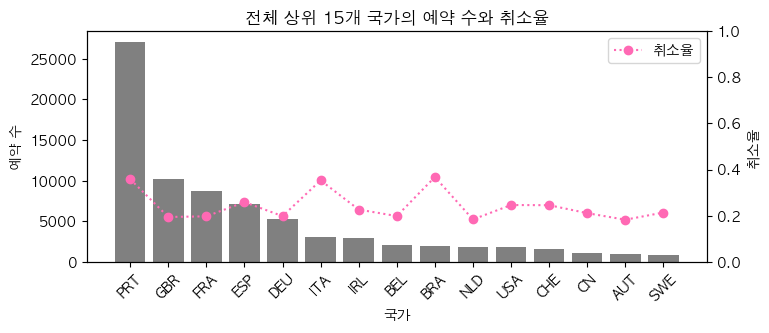

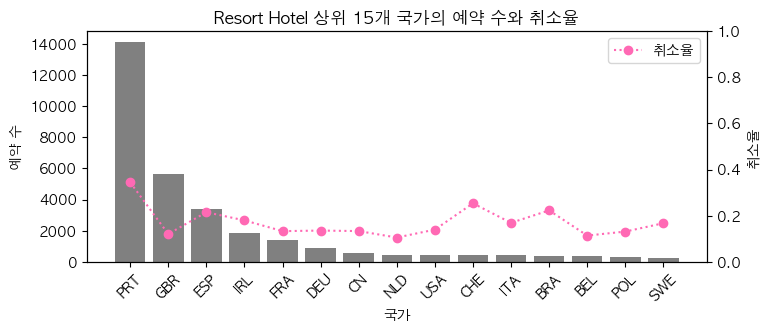

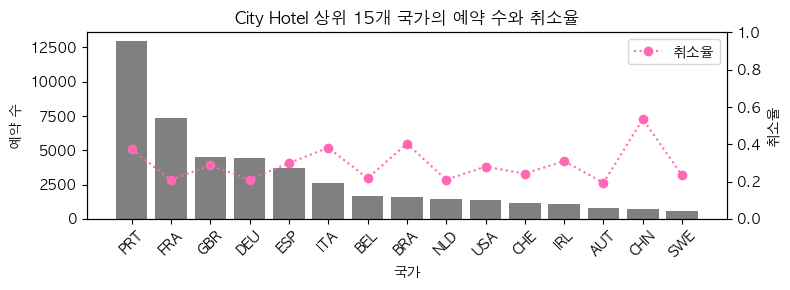

In [21]:
def 특정국가_취소율(hotel_name=None):
    ndf = df.copy()
    if hotel_name:
        ndf = ndf[ndf['호텔 이름'] == hotel_name]

    # 1. 국가별 예약 수와 취소율 계산
    country_stats = ndf.groupby('국가')['취소여부'].agg(예약수='count', 취소율='mean')

    # 2. 상위 예약 수 기준 15개 국가 추출
    top_country_stats = country_stats.sort_values('예약수', ascending=False).head(15)

    # 3. 시각화 (막대: 예약 수 / 선: 취소율)
    fig, ax1 = plt.subplots(figsize=(8, 3))
    # pycountry.countries.get(alpha_3='KOR')
    # 왼쪽 Y축: 예약 수 (막대그래프)
    sns.barplot(
        x=top_country_stats.index,
        y=top_country_stats['예약수'],
        color='gray',
        ax=ax1
    )
    ax1.set_ylabel('예약 수')
    ax1.tick_params(axis='y')
    ax1.set_xticklabels(top_country_stats.index, rotation=45)

    # 오른쪽 Y축: 취소율 (라인그래프)
    ax2 = ax1.twinx()
    ax2.plot(
        top_country_stats.index,
        top_country_stats['취소율'],
        'o:', color='hotpink', label='취소율'
    )
    ax2.set_ylabel('취소율')
    ax2.tick_params(axis='y')
    ax2.set_ylim(0, 1)

    plt.title(f'{hotel_name if hotel_name else "전체"} 상위 15개 국가의 예약 수와 취소율')
    plt.legend()


특정국가_취소율()
특정국가_취소율('Resort Hotel')
특정국가_취소율('City Hotel')

plt.tight_layout()
plt.show()

#### 가설 6. 여름 시즌(7~8월)에는 예약 취소율이 더 낮을 것이다.
여름은 많은 사람들이 휴가를 떠나는 시기이기 때문에, 미리 일정을 확정하고 여행을 실제로 떠나는 비율이 높을 것이라고 생각했습니다. 그래서 7-8월에는 다른 달보다 예약 취소율이 더 낮을 것이라는 가설을 세웠습니다.
<br />
그러나 실제 데이터를 분석한 결과,
7-8월은 예약 수는 가장 많지만, 취소율도 평균보다 높은 편이었습니다.
<br /><br />

##### 인사이트
- 전체 호텔 기준으로 7월과 8월은 예약 수가 가장 많았지만, 취소율은 오히려 평균 이상이었습니다. 특히 8월은 전체에서 가장 높은 예약 수와 함께 비교적 높은 취소율도 함께 나타났습니다.
- Resort Hotel의 경우도 비슷한 경향을 보였습니다.
예약 수는 7~8월에 집중되어 있었고, 취소율은 6월부터 상승하여 8월에 정점을 찍는 모습이었습니다.
- City Hotel은 여름철 취소율이 약간 낮긴 했지만, 전반적으로 다른 달과 큰 차이는 없었고,
오히려 9~11월에는 취소율이 더 안정적으로 낮았습니다.
- 주 단위 분석에서도 7월 8월에 해당하는 27-35주차에서 예약 수와 함께 취소율도 증가한 구간이 확인되었습니다.

<br />

##### 결론

여름 시즌은 여행 수요는 매우 높지만 동시에 취소율도 함께 높아지는 시기로 나타났습니다. 즉, 많은 예약이 잡히는 만큼 계획 변경이나 대체 선택지로 인한 취소 가능성도 큰 시기라는 뜻입니다.

따라서 여름철에는 유연한 취소 정책, 예약 후 리마인드 알림, 사전 결제 유도 등
취소를 줄이기 위한 전략이 더욱 중요할 것으로 보입니다.

##### 전체 호텔 도착 월/주 취소율

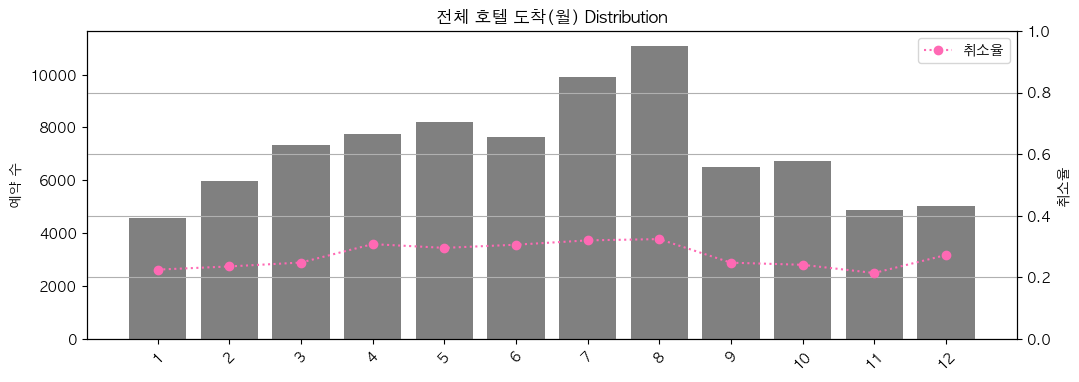

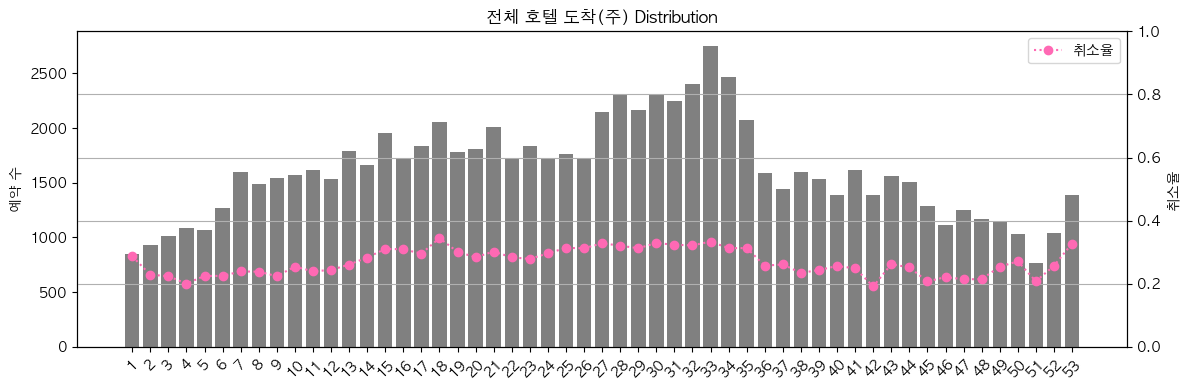

In [22]:
def 도착일_취소율(label, hotel_name=None):
    ndf = df.copy()
    if hotel_name:
        ndf = ndf[ndf['호텔 이름'] == hotel_name]

    data = ndf.groupby(label)['취소여부'].agg(예약수='count', 취소율='mean')

    fig, ax1 = plt.subplots(figsize=(12, 4))

    # 히스토그램: x는 label, y는 'sum' (혹은 count)
    # sns.barplot(x=data.index, y=data['예약수'] , color='gray', ax=ax1)
    ax1.bar(data.index, data['예약수'], color='gray')
    ax1.set_ylabel('예약 수')
    ax1.set_xticks(data.index)
    ax1.set_xticklabels(data.index, rotation=45)

    ax2 = ax1.twinx()
    ax2.plot(data.index, data['취소율'], 'o:', color='hotpink', label='취소율')
    ax2.set_ylabel('취소율')
    ax2.set_ylim(0, 1)

    plt.title(f'{hotel_name if hotel_name else "전체"} {label} Distribution')
    plt.legend()
    plt.grid(True)

도착일_취소율('호텔 도착(월)')
도착일_취소율('호텔 도착(주)')
plt.tight_layout()
plt.show()


##### 호텔별 도착 월/주 취소율



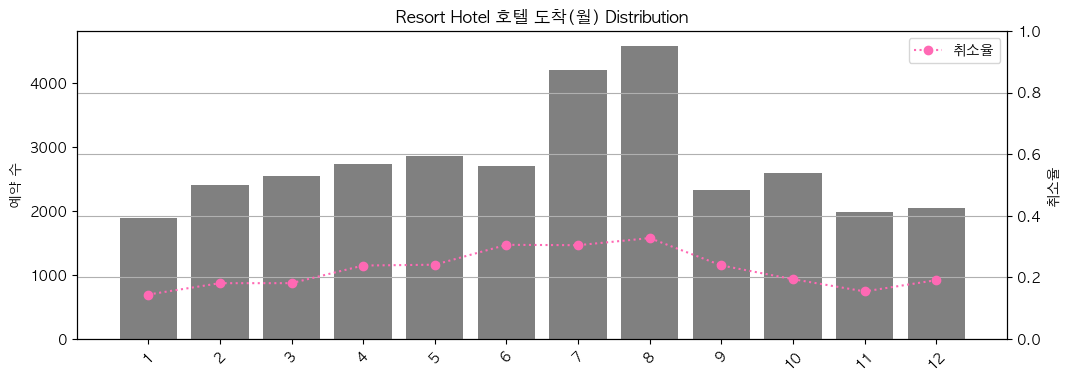

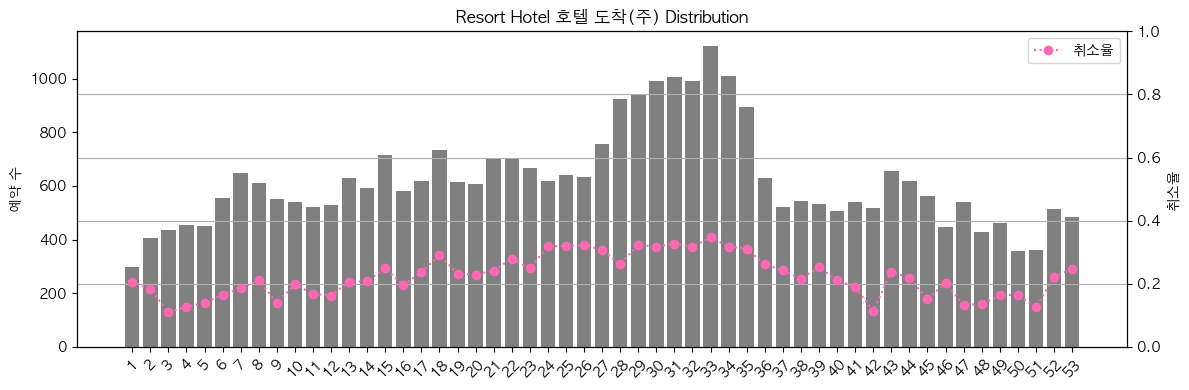

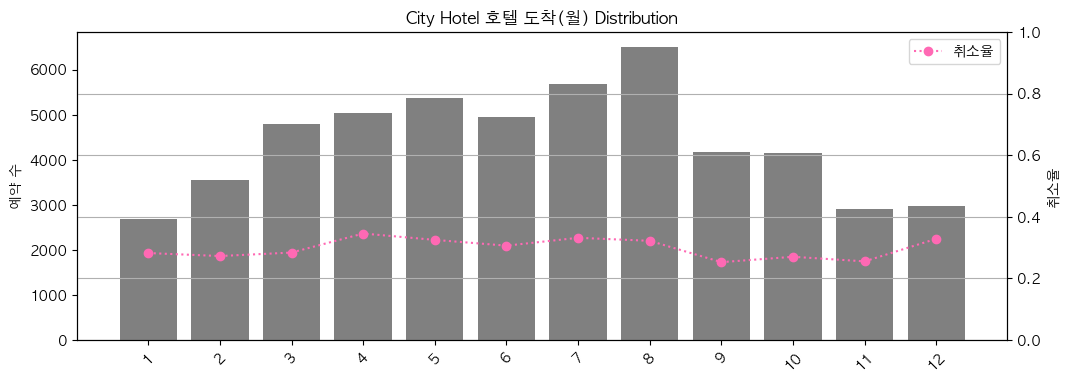

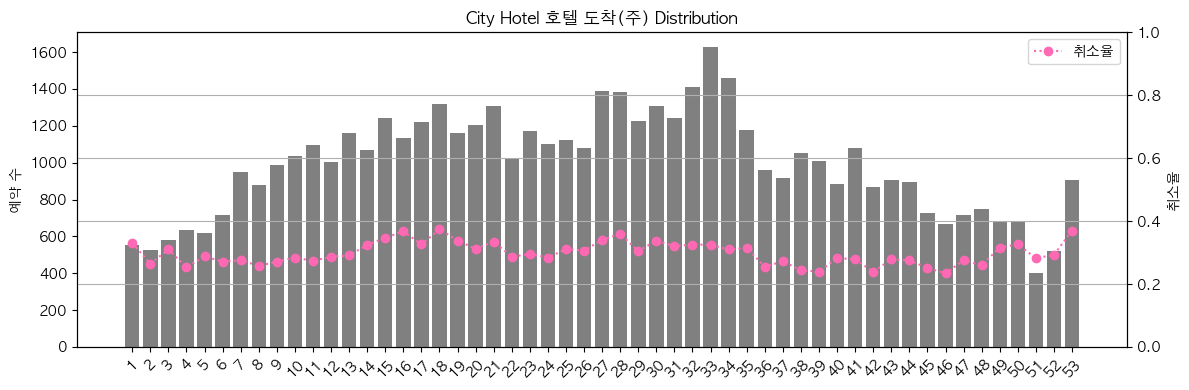

In [23]:
도착일_취소율('호텔 도착(월)', 'Resort Hotel')
도착일_취소율('호텔 도착(주)', 'Resort Hotel')
plt.tight_layout()
plt.show()

도착일_취소율('호텔 도착(월)', 'City Hotel')
도착일_취소율('호텔 도착(주)', 'City Hotel')
plt.tight_layout()
plt.show()

## 최종 결론

이번 분석에서는 호텔 예약 데이터를 활용해 **무엇이 예약 취소에 영향을 줄까?**라는 질문을 중심으로 총 6개의 가설을 세우고 시각화와 함께 검토해보았습니다.
<br />
또한 호텔의 유형(Resort / City)에 따라 어떤 차이가 있는지도 함께 살펴보며
실제 데이터 기반으로 다양한 인사이트를 도출했습니다.
<br /><br />

##### 📌 주요 결과 요약
> 1.	전체 예약 중 약 28%가 취소되었고, City Hotel은 30%가 넘는 취소율로 전체 평균보다 높았어요. 반면 Resort Hotel은 24% 정도로 상대적으로 낮은 취소율을 보였어요.
2.	예약 확정까지 대기하는 시간이 길수록 취소율이 높아지는 경향이 있었어요. 특히 City Hotel은 1주 이상 기다리는 경우부터 급격히 취소율이 올라갔고, 대기일이 1년 이상인 경우 **취소율이 무려 75%**에 달하기도 했습니다.
3.	예약 후 도착일까지 남은 시간이 많을수록 취소 가능성도 커졌어요. 1주 이내 단기 예약은 취소율이 낮았고, 한 달 이상 남은 예약부터는 취소율이 눈에 띄게 증가했어요.
4.	재방문 고객은 전체 고객 중 4% 정도밖에 안 됐지만, 취소율은 5% 이하로 매우 안정적이었어요. 반면 신규 고객은 취소율이 평균 수준(약 28%) 이상으로 나타났어요.
5.	예약된 방과 배정된 방이 다른 경우, 오히려 취소율이 더 낮은 결과가 나왔어요. 코드상의 숫자 차이만 보고 업그레이드/다운그레이드를 구분할 수는 없었지만, 방이 바뀐 경우가 그대로인 경우보다 취소율이 더 낮았다는 점은 흥미로운 포인트였어요.
6.	국가별로도 예약 취소율에 차이가 있었어요. 중국, 아일랜드, 브라질 고객은 취소율이 높았고, 포르투갈, 독일, 영국 고객은 예약 수가 많으면서도 취소율이 낮은 안정적인 경향을 보였어요.
7.	여름 시즌(7-8월)은 예약이 가장 많은 시기였지만, 취소율도 평균 이상으로 높았어요. 특히 Resort Hotel은 8월에 취소율이 정점, City Hotel도 여름이라고 해서 취소율이 낮은 건 아니었어요. 실제로 9-11월이 더 안정적인 시기로 보였습니다.
<br /><br />

##### 🎯 종합 결론

결과적으로 예약 취소율은
> - 예약까지 걸리는 시간,
> - 도착일까지 남은 기간,
> - 고객 유형(신규/재방문),
> - 국가,
> - 계절(특히 여름)

등의 다양한 요소에 따라 달라졌습니다.

<br />

호텔 입장에서 본다면,
> - 대기 시간이 긴 고객을 빨리 확정시켜주는 전략,
> - 장기 예약자에게 리마인드 알림이나 확인 메시지 제공,
> - 재방문 고객 유치를 위한 멤버십 혜택,
> - 국가별 예약 패턴에 맞춘 타겟 마케팅,
> - 여름철에는 유연한 취소 정책 운영 등이

실제로 고객 행동에 영향을 줄 수 있다는 걸 확인할 수 있었어요.